In [10]:
# from pyspark.sql import SparkSession
# import pyspark.pandas as ps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# spark = (
#     SparkSession.builder.appName("BNPL")
#     .config("spark.sql.repl.eagerEval.enabled", True) 
#     .config("spark.sql.parquet.cacheMetadata", "true")
#     .config("spark.driver.memory", "8g")
#     .getOrCreate()
# )

data_directory = "../data/"
tables_directory = data_directory + "tables/"
transactions_directory = "../data/curated/merged_transactions.parquet"


In [11]:
transactions = pd.read_parquet(transactions_directory)
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10830827 entries, 0 to 10830826
Data columns (total 21 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   user_id                        int64         
 1   merchant_abn                   int64         
 2   dollar_value                   float64       
 3   order_id                       object        
 4   order_datetime                 datetime64[ns]
 5   merchant_name                  object        
 6   tags                           object        
 7   sector_tags                    object        
 8   revenue_band                   object        
 9   take_rate                      object        
 10  consumer_name                  object        
 11  state                          object        
 12  postcode                       int64         
 13  gender                         object        
 14  Median_tot_hhd_inc_weekly      float64       
 15  nill_income_p

In [12]:
transactions

,user_id,merchant_abn,dollar_value,order_id,order_datetime,merchant_name,tags,sector_tags,revenue_band,take_rate,...,state,postcode,gender,Median_tot_hhd_inc_weekly,nill_income_percent_F,nill_income_percent_M,Median_age_persons,high_income_proportion,Median_mortgage_repay_monthly,house_repay_to_income
0,20864,28000487688,378.937918,f7eca4c5-474b-4ab2-ad61-6a8219b26d67,2021-02-28,Sed Nunc Industries,"((books, periodicals, anD newspapers), (b), (t...","books, periodicals, and newspapers",b,4.24,...,QLD,4113,Female,1823.0,0.114313,0.074165,35.0,0.072483,1730.0,0.218997
1,20864,62191208634,105.275480,0965a716-5365-4142-9e01-bf2312cc6a9e,2021-06-30,Cursus Non Egestas Foundation,"[(furniture, home furnishings and equipment sh...","furniture, home furnishings and equipment shop...",c,2.17,...,QLD,4113,Female,1823.0,0.114313,0.074165,35.0,0.072483,1730.0,0.218997
2,20864,62191208634,15.615912,221aa65a-ae0e-4a09-a729-a671443457b5,2022-02-21,Cursus Non Egestas Foundation,"[(furniture, home furnishings and equipment sh...","furniture, home furnishings and equipment shop...",c,2.17,...,QLD,4113,Female,1823.0,0.114313,0.074165,35.0,0.072483,1730.0,0.218997
3,20864,83690644458,97.497376,5a556b74-01c0-4e33-95e0-6bc71becffc5,2021-02-28,Id Erat Etiam Consulting,"[(gift, card, novelty, and souvenir shops), (b...","gift, card, novelty, and souvenir shops",b,3.15,...,QLD,4113,Female,1823.0,0.114313,0.074165,35.0,0.072483,1730.0,0.218997
4,20864,83690644458,69.286983,08c7cfed-0b51-4346-93fa-1691815f4b02,2022-05-25,Id Erat Etiam Consulting,"[(gift, card, novelty, and souvenir shops), (b...","gift, card, novelty, and souvenir shops",b,3.15,...,QLD,4113,Female,1823.0,0.114313,0.074165,35.0,0.072483,1730.0,0.218997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10830822,17669,62368259299,179.064463,97dc079b-6207-463a-9a5a-1faecaf265bf,2021-03-10,Et Rutrum Associates,"([motor vehicle supplies and new parts], [a], ...",motor vehicle supplies and new parts,a,6.41,...,QLD,4216,Undisclosed,1336.0,0.077880,0.059577,50.0,0.085562,1800.0,0.310917
10830823,17669,70268417986,204.315230,69aa1210-e503-41aa-b774-90f371ca8c2d,2021-11-17,Risus Donec Institute,"[[furniture, home furnishings and equipment sh...","furniture, home furnishings and equipment shop...",a,6.29,...,QLD,4216,Undisclosed,1336.0,0.077880,0.059577,50.0,0.085562,1800.0,0.310917
10830824,17669,63907965541,3236.125981,d540e880-d653-4dc4-9d1a-3773ae217ab9,2022-05-01,Massa Mauris Corporation,"[[art dealers and galleries], [c], [take rate:...",art dealers and galleries,c,1.69,...,QLD,4216,Undisclosed,1336.0,0.077880,0.059577,50.0,0.085562,1800.0,0.310917
10830825,17669,93429143824,438.708667,7f38855a-d79c-4868-a5d1-b40311177330,2022-08-26,Fames Ac Associates,"[[lawn and garden supply Outlets, including nu...","lawn and garden supply outlets, including nurs...",c,1.64,...,QLD,4216,Undisclosed,1336.0,0.077880,0.059577,50.0,0.085562,1800.0,0.310917


# Merchants with small consumer base but high revenue 

In [13]:
transactions_col = transactions.groupby(['merchant_abn']).agg({"merchant_name": lambda x: x.iloc[0],"dollar_value": np.sum, "user_id": pd.Series.nunique, "order_id": np.count_nonzero}).reset_index()
transactions_col.rename(columns={'user_id':'user_total', 'order_id':'order_total'}, inplace = True)
transactions_col

,merchant_abn,merchant_name,dollar_value,user_total,order_total
0,10023283211,Felis Limited,5.307179e+05,2432,2599
1,10142254217,Arcu Ac Orci Corporation,7.968341e+04,2267,2406
2,10165489824,Nunc Sed Company,2.002618e+04,3,3
3,10187291046,Ultricies Dignissim Lacus Foundation,3.069387e+04,280,281
4,10192359162,Enim Condimentum PC,1.142171e+05,292,293
...,...,...,...,...,...
4011,99938978285,Elit Dictum Eu Ltd,3.468858e+05,9950,13715
4012,99974311662,Mollis LLP,2.610161e+04,100,100
4013,99976658299,Sociosqu Corp.,2.652580e+06,12197,18644
4014,99987905597,Commodo Hendrerit LLC,4.295354e+04,136,136


/Users/jamespark/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='user_total', ylabel='dollar_value'>

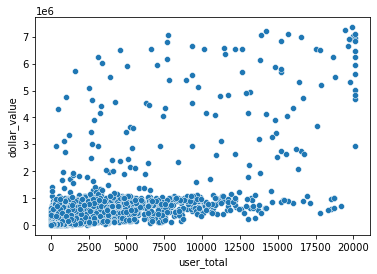

In [14]:
sns.scatterplot(transactions_col['user_total'], transactions_col['dollar_value'])

We see some unique points where a small customer base (<5000) has a very high dollar transactions value that is on par or higher than other merchants with a larger customer base.

/Users/jamespark/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 5000.0)

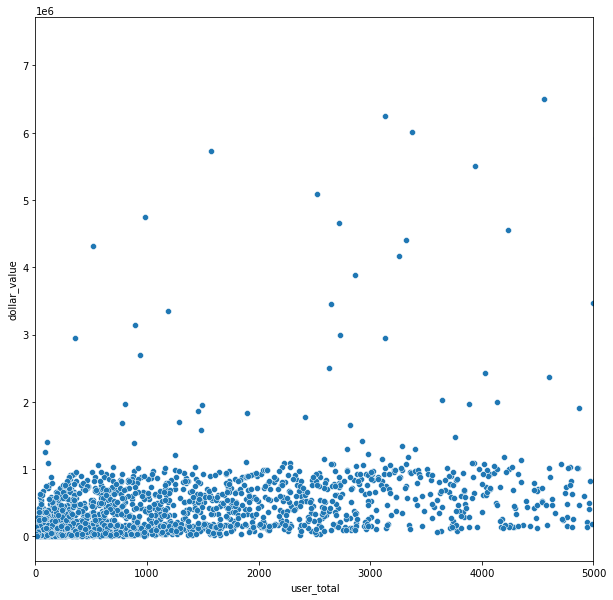

In [15]:
plt.figure(figsize=(10,10))
sns.scatterplot(transactions_col['user_total'], transactions_col['dollar_value'])
plt.xlim((0,5000))

We will put the cutoff at 3000000 dollars and key out those merchants as interesting

In [18]:
interesting_merch = transactions_col[(transactions_col['dollar_value']>3000000) & (transactions_col['user_total']<5000)]

In [19]:
interesting_merch.sort_values('dollar_value', ascending=False)

,merchant_abn,merchant_name,dollar_value,user_total,order_total
1326,38700038932,Etiam Bibendum Industries,6.497034e+06,4560,5182
3145,79827781481,Amet Risus Inc.,6.252337e+06,3133,3424
3259,82368304209,Nec Incorporated,6.007333e+06,3374,3716
3728,93260930990,Pede Cras Vulputate Ltd,5.735923e+06,1574,1643
2952,75454398468,Tempus Non Lacinia Corporation,5.511194e+06,3940,4353
984,31385641294,Semper Auctor PC,5.089212e+06,2524,2710
981,31334588839,Lacus Aliquam Corporation,4.749434e+06,984,1012
3941,98166254020,Magna Sed Industries,4.661094e+06,2716,2918
802,27326652377,Tellus Aenean Corporation,4.559369e+06,4236,4780
2689,70009327857,Torquent Per Inc.,4.412235e+06,3316,3651


# Merchants where transactions are high dollar values on average
The main idea is that since BNPL would help ease the burden of paying a high price by paying in installments, merchants that usually sell products at a high price would likely have an increase influx of customers. Not only that, with the adoption of BNPL, many shoppers would be inclined to use BNPL again as they gain more control over their cash flows. "In fact, a March 2021 study by the Motley Fool found 36% of BNPL shoppers use it once a month or more". So these merchants would be interesting as they could potententially be much more successful in the future. (https://mutesix.com/break-it-down-five-tips-to-choosing-the-right-bnpl-provider-for-your-brand/)

In [20]:
transactions_col2 = transactions.groupby(['merchant_abn']).agg(merchant_name=pd.NamedAgg(column='merchant_name', aggfunc="first")
                                                              ,mean_dollar=pd.NamedAgg(column='dollar_value', aggfunc="mean")
                                                              ).reset_index()
transactions_col2

,merchant_abn,merchant_name,mean_dollar
0,10023283211,Felis Limited,204.200792
1,10142254217,Arcu Ac Orci Corporation,33.118624
2,10165489824,Nunc Sed Company,6675.393943
3,10187291046,Ultricies Dignissim Lacus Foundation,109.230844
4,10192359162,Enim Condimentum PC,389.819485
...,...,...,...
4011,99938978285,Elit Dictum Eu Ltd,25.292437
4012,99974311662,Mollis LLP,261.016051
4013,99976658299,Sociosqu Corp.,142.275243
4014,99987905597,Commodo Hendrerit LLC,315.834825


<AxesSubplot:xlabel='mean_dollar', ylabel='Count'>

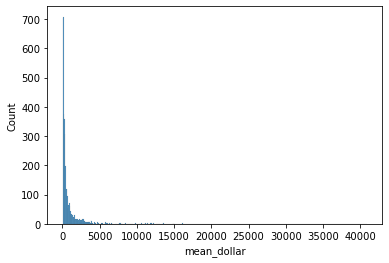

In [21]:
sns.histplot(transactions_col2['mean_dollar'])

<AxesSubplot:xlabel='mean_dollar', ylabel='Count'>

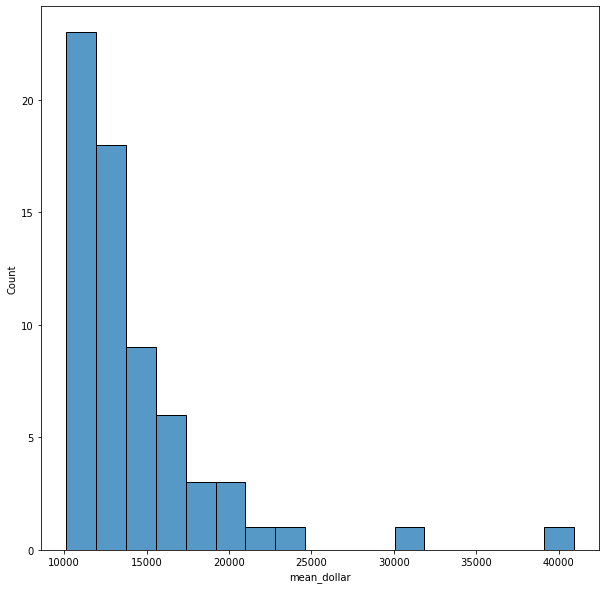

In [22]:
plt.figure(figsize=(10,10))
high_trans = transactions_col2[transactions_col2['mean_dollar']>10000]
sns.histplot(high_trans['mean_dollar'])


These are the mean average transaction price per merchants, and we see quite a few merchants. It is safe to use mean as we already removed fraud detections and outliers. These 100 merchants are where we would have like to have more insight on in the future.

In [23]:
high_trans.sort_values('mean_dollar')

,merchant_abn,merchant_name,mean_dollar
1192,35575706403,Tempus Mauris Ltd,10129.400990
233,15293888435,Ipsum Sodales Purus Company,10182.901784
3036,77334889816,Massa Ltd,10277.759404
2120,56738316313,Sollicitudin A LLP,10278.997056
35,10881038707,Sed Facilisis Vitae Incorporated,10598.544212
...,...,...,...
3872,96730987906,Mattis Ornare Lectus Limited,20835.498208
843,28385291716,Vel Arcu Curabitur Inc.,22684.034343
3559,89109402284,Interdum Feugiat Sed Incorporated,23969.005623
572,22503967537,Iaculis Quis LLC,31451.902547


# Customer demographics to see which state has highest demand

<AxesSubplot:xlabel='state', ylabel='dollar_value'>

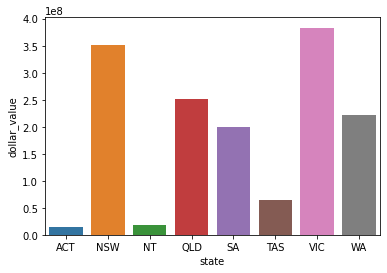

In [24]:
transactions_col4 = transactions.groupby(['state']).agg({"dollar_value": np.sum}).reset_index()
sns.barplot(data=transactions_col4, x='state',y='dollar_value')

We do see much of consumer transactions happening in New South Wales, Victoria, Western Australia and Queensland for the top 4. This is most likely due those 4 states being the richest states in Australia. Data retrieved from Australian Buereau of Statistics, respective GSP in the million (A$) for each state/territory in 2019-20 is:
- New South Whales: 624,923 (32.09\%)
- Victoria: 458,895 (23.57\%)
- Queensland: 363,524 (18.67\%)
- Western Australia: 292,284 (15.01\%)
- South Australia: 108,334 (5.58\%)
- Australian Capital Territory: 40,902 (2.1\%)
- Tasmania: 32,102 (1.65\%)
- Northern Territory: 26,153 (1.34\%)

We can see that the top 3 states with the highest GSP are also the top 3 highest consumer transactions in dollar amount. Interesting to see how merchants located in these states would most likely be a better option as they would more likely to increase in their sales.

We will pick the top 3 states and look deeper into merchants that contains majority of consumers from those states

In [26]:
interesting_merch4 = transactions.groupby('merchant_abn').agg({'state':pd.Series.mode, "merchant_name": lambda x: x.iloc[0],"dollar_value": np.sum}).reset_index()
interesting_merch4['state']=interesting_merch4['state'].astype(str)
interesting_merch4.loc[interesting_merch4.state.isin(['NSW','VIC', 'WA'])].sort_values('dollar_value')

,merchant_abn,state,merchant_name,dollar_value
3175,80426072728,NSW,Massa Non Ante Industries,2.798857e+03
4002,99785979138,VIC,Elit Curabitur LLP,5.041652e+03
3412,86137100428,NSW,Orci Company,5.042415e+03
375,18142272571,VIC,Ligula Nullam Inc.,5.685930e+03
1099,33754604709,WA,Nullam Suscipit Ltd,5.939066e+03
...,...,...,...,...
3434,86578477987,VIC,Leo In Consulting,7.083122e+06
1211,35909341340,VIC,Arcu Sed Eu Incorporated,7.110121e+06
3871,96680767841,VIC,Ornare Limited,7.211799e+06
1031,32361057556,VIC,Orci In Consequat Corporation,7.241257e+06


# Interesting Merchants based on our model

Below are the rankings by sector of the top merchants based on our model

In [34]:
import pandas as pd
rankings = pd.read_csv('../results/rankings.csv')
rankings.head(10)

,merchant_abn,name,sector_tags,retention,momentum_score,revenue_score,customer_quality,score
0,86578477987,Leo In Consulting,"watch, clock, and jewelry repair shops",0.969028,0.580496,0.952110,0.770702,0.880765
1,32361057556,Orci In Consequat Corporation,"gift, card, novelty, and souvenir shops",0.664392,0.616855,1.000000,0.774540,0.869641
2,64403598239,Lobortis Ultrices Company,"music shops - musical instruments, pianos, and...",0.773248,0.602984,0.965683,0.764959,0.862341
3,89726005175,Est Nunc Consulting,tent and awning shops,0.937524,0.613811,0.861313,0.766881,0.826176
4,21439773999,Mauris Non Institute,"cable, satellite, and other pay television and...",0.780963,0.595851,0.894282,0.777622,0.820854
5,45629217853,Lacus Consulting,"gift, card, novelty, and souvenir shops",0.941055,0.575384,0.819798,0.763485,0.795693
6,48534649627,Dignissim Maecenas Foundation,"opticians, optical goods, and eyeglasses",0.560206,0.614034,0.858046,0.763377,0.767301
7,94493496784,Dictum Phasellus In Institute,"gift, card, novelty, and souvenir shops",0.717041,0.584147,0.815619,0.769235,0.761473
8,49322182190,Gravida Mauris Incorporated,"watch, clock, and jewelry repair shops",0.492738,0.578918,0.862436,0.762769,0.754487
9,96680767841,Ornare Limited,motor vehicle supplies and new parts,0.328149,0.564826,0.897430,0.780714,0.750476


After producing the rankings, we noticed some interesting merchants. When we ordered by score in our rankings dataset, one merchant particularly stood out. Despite being in the top 10 merchants, 'Dictum Phasellus In Institute' has the lowest revenue amongst this group. However, the retention score is comparitively high, further supporting the claim that retention is a powerful separator between merchants. 

Additionally, 'Orci In Consequat Coorperation' is a top 2 merchant, despite having one of the lowest retention scores and average customer quality score. But, this merchant was scored a 1.00 in regards to revenue, reinforcing the importance of this factor in the model.

Overall, customer retention is an interesting factor in merchants that is vital to future sales of merchants as many companies generate majority of their revenue from existing customers (61% of SMBs from a BIA/Kelsey report). Not only that, repeat customers would tend to spend more over time, increasing their average order value. Bain & Company showed that a 5% increase in retention rate could lead to profits growing 25-95%, which would be an enormous increase, which would be key merchants that BNPL should take in. 

Information taken from ("What Is Customer Retention? Importance, Metrics & Strategies
") Oracle written by Austin Caldwell 
(https://www.netsuite.com.au/portal/au/resource/articles/crm/customer-retention.shtml)